**About Dataset**

Netflix stands as a leading force in the realm of media and video streaming. With a staggering array of over 8,000 movies and TV shows accessible on their platform, as of mid-2021, their global subscriber count exceeds 200 million. This tabulated dataset comprehensively catalogues all offerings on Netflix, including vital details such as cast, directors, ratings, release year, duration, and more.

**Dataset Overview:**

The Netflix Titles dataset is a comprehensive compilation of movies and TV shows available on Netflix, covering various aspects such as the title type, director, cast, country of production, release year, rating, duration, genres (listed in), and a brief description. This dataset is instrumental for analyzing trends in Netflix content, understanding genre popularity, and examining the distribution of content across different regions and time periods.

**Key Details:**
- **Total Entries:** The dataset contains 8,809 entries, each representing a unique movie or TV show.
- **Columns:** There are 12 columns in the dataset:
    - **show_id:** A unique identifier for each title.
    - **type:** The category of the title, which is either 'Movie' or 'TV Show'.
    - **title:** The name of the movie or TV show.
    - **director:** The director(s) of the movie or TV show. (Contains null values for some entries, especially TV shows where this information might not be applicable.)
    - **cast:** The list of main actors/actresses in the title. (Some entries might not have this information.)
    - **country:** The country or countries where the movie or TV show was produced.
    - **date_added:** The date the title was added to Netflix.
    - **release_year:** The year the movie or TV show was originally released.
    - **rating:** The age rating of the title.
    - **duration:** The duration of the title, in minutes for movies and seasons for TV shows.
    - **listed_in:** The genres the title falls under.
    - **description:** A brief summary of the title.


In [4]:
## Importamos todos nuestras librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt

In [5]:
## cargamos los datasets que necesitaremos
name_basics = pd.read_csv(r'./data/name.basics.tsv', sep='\t')
title_akas = pd.read_csv(r'./data/title.akas.tsv', sep='\t')
title_basics = pd.read_csv(r'./data/title.basics.tsv', sep='\t')
title_principals = pd.read_csv(r'./data/title.principals.tsv', sep='\t')
title_ratings = pd.read_csv(r'./data/title.ratings.tsv', sep='\t')

print(name_basics)

C:\Users\avidr\AppData\Local\Temp\ipykernel_23100\3322638648.py:4: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



             nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
13455742  nm9993714   Romeo del Rosario        \N        \N   
13455743  nm9993716       Essias Loberg        \N        \N   
13455744  nm9993717  Harikrishnan Rajan        \N        \N   
13455745  nm9993718         Aayush Nair        \N        \N   
13455746  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0                actor,miscellaneous,producer   
1          actress,soundtrack,archive_footage   
2           actress,music_department,producer   
3               actor,writer,music_department  

In [6]:
## Mostramos contenido
display(name_basics.head(10))
display(title_akas.head(10))
display(title_basics.head(10))
display(title_principals.head(10))
display(title_ratings.head(10))

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,producer,soundtrack","tt0034583,tt0036855,tt0038109,tt0038787"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,producer,miscellaneous","tt0034583,tt0042593,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,director,writer","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,producer,director","tt0061184,tt0087803,tt0059749,tt0057877"
9,nm0000010,James Cagney,1899,1986,"actor,director,producer","tt0029870,tt0031867,tt0042041,tt0035575"


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita,\N,\N,original,\N,1
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita,US,\N,imdbDisplay,\N,0
3,tt0000001,4,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
4,tt0000001,5,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
5,tt0000001,6,Карменсита,RU,\N,imdbDisplay,\N,0
6,tt0000001,7,Карменсіта,UA,\N,imdbDisplay,\N,0
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0005690,producer,producer,\N
3,tt0000001,4,nm0374658,cinematographer,director of photography,\N
4,tt0000002,1,nm0721526,director,\N,\N
5,tt0000002,2,nm1335271,composer,\N,\N
6,tt0000003,1,nm0721526,director,\N,\N
7,tt0000003,2,nm1770680,producer,producer,\N
8,tt0000003,3,nm0721526,producer,producer,\N
9,tt0000003,4,nm1335271,composer,\N,\N


,tconst,averageRating,numVotes
0,tt0000001,5.7,2052
1,tt0000002,5.7,275
2,tt0000003,6.5,2007
3,tt0000004,5.4,179
4,tt0000005,6.2,2771
5,tt0000006,5.1,185
6,tt0000007,5.4,858
7,tt0000008,5.4,2194
8,tt0000009,5.4,211
9,tt0000010,6.8,7554


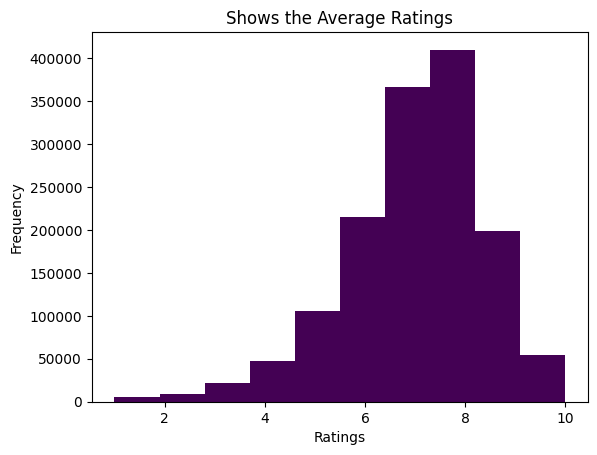

In [7]:
#Gráfico del Histograma de Datos
title_ratings['averageRating'].plot(kind='hist', cmap='viridis')
plt.title('Shows the Average Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

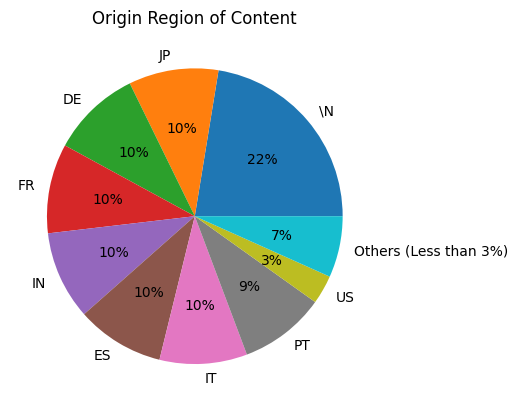

In [8]:

# Asumiendo que 'title_akas' es tu DataFrame y 'region' es la columna de interés
region_counts = title_akas['region'].value_counts()

# Convertir los conteos a porcentajes
total = region_counts.sum()
region_percentages = (region_counts / total) * 100

# Filtrar las regiones con menos del 3% y agruparlas como 'Otros'
threshold = 3
small_categories = region_percentages[region_percentages < threshold].index
region_counts['Others (Less than 3%)'] = region_counts[small_categories].sum()  # Sumar las pequeñas categorías y agregarlas como 'Otros'
region_counts = region_counts.drop(small_categories)  # Eliminar las pequeñas categorías del conteo original

# Crear una lista de 'explode', ahora sin las categorías menores al 3%
explode_values = [0.1 if region == 'Others' else 0 for region in region_counts.index]

# Ahora crea el gráfico de pastel asegurando que 'explode' tiene la longitud adecuada
region_counts.plot(kind='pie', explode=explode_values, autopct='%.0f%%', cmap='tab10')
plt.title('Origin Region of Content')
plt.axis('off')  # Oculta los ejes para un gráfico de pastel
plt.show()





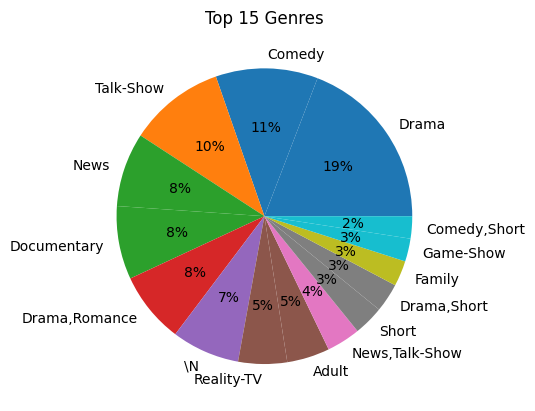

NameError: name 'df' is not defined

In [9]:
# Asumiendo que 'title_basics' es tu DataFrame y 'genres' es la columna de interés
genres_counts = title_basics['genres'].value_counts()

# Seleccionar los 15 géneros más frecuentes
top_genres = genres_counts.nlargest(15)

# Crear una lista de 'explode', con un pequeño énfasis en 'Others'
explode_values = [0.1 if genre == 'Others' else 0 for genre in top_genres.index]

# Crear el gráfico de pastel
top_genres.plot(kind='pie', explode=explode_values, autopct='%.0f%%', cmap='tab10')
plt.title('Top 15 Genres')
plt.axis('off')  # Oculta los ejes para un gráfico de pastel
plt.show()
display(df)

In [ ]:

# Calcular la frecuencia de cada 'startYear'
year_counts = title_basics['startYear'].value_counts()

# Seleccionar los años desde el 2º al 12º en términos de frecuencia, excluyendo el más frecuente
top_years = year_counts.iloc[1:12].index  # iloc para seleccionar rangos específicos

# Filtrar el DataFrame para incluir solo esos 11 años
filtered_title_basics = title_basics[title_basics['startYear'].isin(top_years)]

# Establecer el estilo estético de los gráficos
sns.set_style('darkgrid')

# Crear el gráfico con Seaborn
catplot = sns.catplot(data=filtered_title_basics, y='startYear', kind='count', palette='hot', height=6, aspect=2, order=top_years.astype(str))

# Configurar títulos y etiquetas
catplot.set_axis_labels('Frequency', 'Years')
plt.title('Top 10 Years in Which Most Titles Started')

# Mostrar el gráfico
plt.show()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No avaible,United States,2021-09-25 00:00:00,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,No avaible,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No avaible,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,No avaible,No avaible,No avaible,2021-09-24 00:00:00,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,No avaible,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24 00:00:00,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01 00:00:00,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11 00:00:00,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02 00:00:00,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.fillna('No avaible', inplace=True)
display(df)

show_id
s2                             Blood & Water
s4                     Jailbirds New Orleans
s5                              Kota Factory
s11      Vendetta: Truth, Lies and The Mafia
s15          Crime Stories: India Detectives
                        ...                 
s8796                        Yu-Gi-Oh! Arc-V
s8797                             Yunus Emre
s8798                              Zak Storm
s8801                     Zindagi Gulzar Hai
s8804                            Zombie Dumb
Name: title, Length: 2634, dtype: object

In [ ]:
df.loc[df['director']=='No avaible','title']


2677

In [ ]:
number_movies = df.loc[df['type']=='TV Show', 'title'].count()
number_movies